In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import tensorflow.keras as keras
import os
import matplotlib.pyplot as plt
from keras import layers
from tensorflow.keras.applications.resnet50 import preprocess_input, ResNet50

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

In [3]:
#set path
path = os.path.join("/Users/User/Desktop/fall_detection/fall-notfall-data")

In [4]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [5]:
batch_size = 32 #batch -> number of samples to work through before updating the internal model parameters
img_height = 128 #set img height
img_width = 128 #set img width

In [6]:
train_dataset = keras.utils.image_dataset_from_directory(
    directory=path,
    image_size=(img_width, img_height),
    batch_size=batch_size,
    label_mode="int",
    validation_split=0.3,
    subset="training",
    shuffle=True,
    seed=42
)
train_dataset

Found 485 files belonging to 2 classes.
Using 340 files for training.


<BatchDataset shapes: ((None, 128, 128, 3), (None,)), types: (tf.float32, tf.int32)>

In [7]:
validation_dataset = keras.utils.image_dataset_from_directory(
    directory=path,
    image_size=(img_width, img_height),
    batch_size=batch_size,
    label_mode="int",
    validation_split=0.3,
    subset="validation",
    shuffle=True,
    seed=42
)

Found 485 files belonging to 2 classes.
Using 145 files for validation.


In [8]:
class_names = train_dataset.class_names
print(class_names)

['p_fall', 'p_notfall']


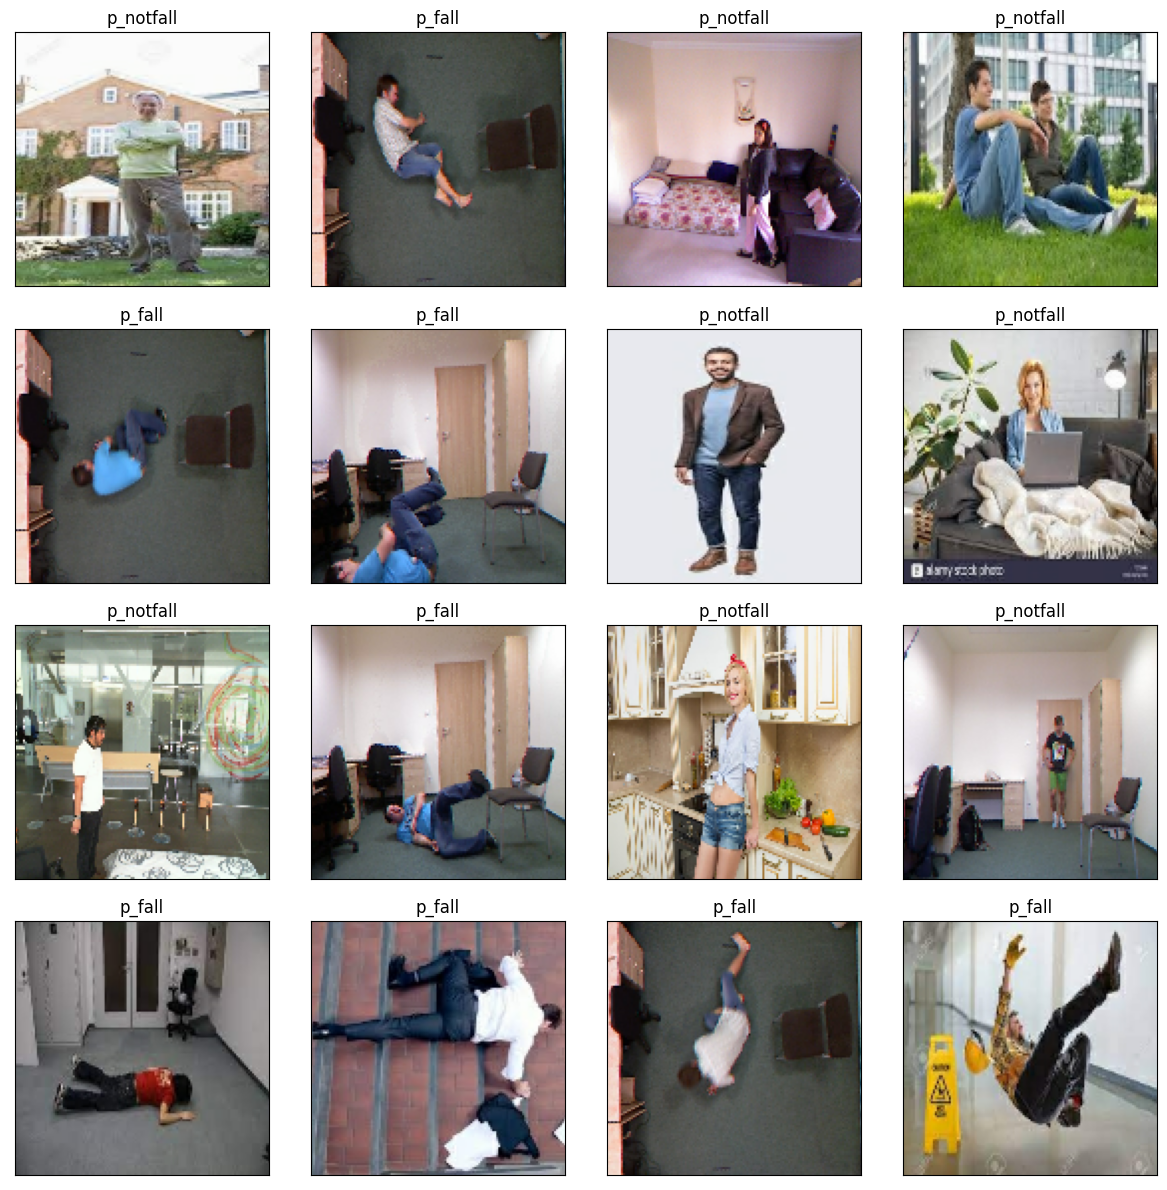

In [9]:
#just show image with label
fig, ax = plt.subplots(4, 4, figsize=(12, 12))
ax = ax.flat

for images, labels in train_dataset.take(1):
    for i in range(16):
        ax[i].set_title(class_names[labels[i].numpy()])
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        ax[i].imshow(images[i].numpy().astype("uint8"))

plt.tight_layout()
plt.show()

In [10]:
#labels = np.concatenate([label.numpy() for image, label in train_dataset], axis=0)
#unique, counts = np.unique(labels, return_counts=True)

#plt.pie(x=counts, labels=class_names, autopct='%.1f%%', textprops={'size': 'smaller'},
#        colors=sns.color_palette('pastel')[0:8])
#plt.title("Class distribution")
#plt.show()

In [12]:
train_image_count = sum(1 for _ in train_dataset)
val_image_count = sum(1 for _ in validation_dataset)

print("Number of training images:", train_image_count)
print("Number of validation images:", val_image_count)


Number of training images: 11
Number of validation images: 5


In [13]:
# Load the test dataset from the directory
test_dataset = keras.utils.image_dataset_from_directory(
    directory=path,
    image_size=(img_width, img_height),
    batch_size=batch_size,
    label_mode="int",
    shuffle=False  # Typically, you don't shuffle the test dataset
)

Found 485 files belonging to 2 classes.


In [14]:
# Check pixel intesities
for image, label in train_dataset.take(1):
  print(tf.reduce_max(image))
  print(tf.reduce_min(image))

tf.Tensor(255.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)


In [15]:
image[0]

<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[131.35724  , 136.5838   ,  91.35724  ],
        [110.81967  , 113.54373  ,  70.6817   ],
        [118.6474   , 117.38959  ,  74.163025 ],
        ...,
        [137.78906  , 122.933075 ,  83.705475 ],
        [121.51721  , 111.444244 ,  67.03018  ],
        [115.6875   , 112.0499   ,  63.736145 ]],

       [[115.1864   , 116.63953  ,  75.95984  ],
        [135.20956  , 135.17847  ,  95.033936 ],
        [101.27338  ,  97.7265   ,  59.046814 ],
        ...,
        [145.50406  , 132.60953  ,  91.95328  ],
        [ 94.141846 ,  86.06732  ,  46.427765 ],
        [ 84.83078  ,  80.07547  ,  43.94281  ]],

       [[113.76611  , 109.60986  ,  77.60986  ],
        [128.057    , 122.72574  ,  89.90387  ],
        [118.62268  , 110.24118  ,  77.92215  ],
        ...,
        [105.90015  ,  97.47827  ,  53.611084 ],
        [139.3887   , 134.51605  ,  93.838715 ],
        [135.67188  , 131.53906  ,  96.9375   ]],

       ...,

     

In [16]:
class_names[labels[0].numpy()]

'p_notfall'

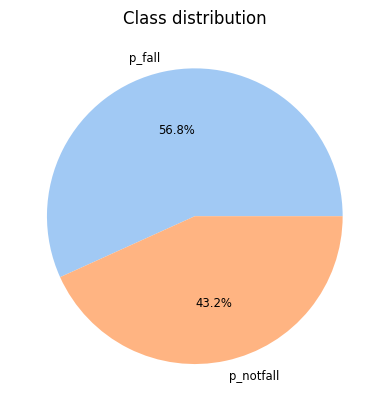

In [17]:
labels = np.concatenate([label.numpy() for image, label in train_dataset], axis=0)
unique, counts = np.unique(labels, return_counts=True)

plt.pie(x=counts, labels=class_names, autopct='%.1f%%', textprops={'size': 'smaller'},
        colors=sns.color_palette('pastel')[0:8])
plt.title("Class distribution")
plt.show()

In [18]:
num_elements = len(train_dataset)
train_size = int(0.8 * num_elements)
val_dataset = train_dataset.skip(train_size).prefetch(tf.data.AUTOTUNE)
train_dataset = train_dataset.take(train_size).prefetch(tf.data.AUTOTUNE)

# Check length
len(train_dataset), len(val_dataset), len(validation_dataset), num_elements

(8, 3, 5, 11)

In [19]:
# Create a lab-book to track the different experiments
lab_book = {}

# Create early stopping callback
early_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True,
                                         monitor="val_accuracy", min_delta=0.005)

In [20]:
from tensorflow import keras
name = 'model1'
model1 = keras.Sequential([
     # First Convolutional Layer
    keras.layers.Conv2D(16, (3, 3), padding='same', input_shape=(img_height, img_width, 3), activation='relu'),
    keras.layers.MaxPooling2D(),

     # Second Convolutional Layer
    keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),

     # Third Convolutional Layer
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(),
    
     # Flatten layer to transition from convolutional to dense layers
    keras.layers.Flatten(),

     # Dense (Fully Connected) Layers
    keras.layers.Dense(128, activation='relu'),

     # Output layer (Assuming binary classification, use 'sigmoid' for binary, 'softmax' for multi-class)
    keras.layers.Dense(3, activation='softmax')
], name=name)

# # Compile the model
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Display the model summary
model1.summary()

Model: "model1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 14400)             0    

In [21]:
history1 = model1.fit(train_dataset,
                        validation_data=val_dataset,
                        epochs=100,
                        callbacks=[early_cb])

Epoch 1/100
8/8 [==============================] - 4s 58ms/step - loss: 220.7242 - accuracy: 0.5273 - val_loss: 6.0601 - val_accuracy: 0.5119
Epoch 2/100
8/8 [==============================] - 0s 39ms/step - loss: 4.2982 - accuracy: 0.4492 - val_loss: 1.1318 - val_accuracy: 0.5714
Epoch 3/100
8/8 [==============================] - 0s 38ms/step - loss: 0.7389 - accuracy: 0.6211 - val_loss: 0.5373 - val_accuracy: 0.7500
Epoch 4/100
8/8 [==============================] - 0s 37ms/step - loss: 0.5254 - accuracy: 0.7773 - val_loss: 0.3354 - val_accuracy: 0.8690
Epoch 5/100
8/8 [==============================] - 0s 40ms/step - loss: 0.3881 - accuracy: 0.8555 - val_loss: 0.2911 - val_accuracy: 0.9167
Epoch 6/100
8/8 [==============================] - 0s 40ms/step - loss: 0.2646 - accuracy: 0.9062 - val_loss: 0.1278 - val_accuracy: 0.9762
Epoch 7/100
8/8 [==============================] - 0s 42ms/step - loss: 0.1539 - accuracy: 0.9727 - val_loss: 0.1038 - val_accuracy: 0.9762
Epoch 8/100
8/8 [=

In [22]:
train_accuracy = model1.evaluate(train_dataset)[1]
val_accuracy = model1.evaluate(val_dataset)[1]
lab_book[name] = {"train_accuracy": train_accuracy, "val_accuracy": val_accuracy}

3/3 [==============================] - 0s 5ms/step - loss: 0.0596 - accuracy: 0.9881


In [26]:
#from tensorflow.keras.applications import VGG16
#from tensorflow.keras import layers, models

# Load VGG16 model pre-trained on ImageNet data
#base_model2 = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the layers of the base model
#for layer in base_model2.layers:
#    layer.trainable = False

# Create a new model by adding your classification layers
#model2 = models.Sequential()
#model2.add(base_model)
#model2.add(layers.Flatten())
#model2.add(layers.Dense(256, activation='relu'))
#model2.add(layers.Dropout(0.5))
#model2.add(layers.Dense(3, activation='softmax'))  # Binary classification, so use 1 output with sigmoid activation
#model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Summary of the model architecture
#model2.summary()

In [27]:
model1.fit(train_dataset,
                        validation_data=val_dataset,
                        epochs=100,
                        callbacks=[early_cb])

Epoch 1/100
8/8 [==============================] - 1s 71ms/step - loss: 0.0129 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 2/100
8/8 [==============================] - 0s 39ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 3/100
8/8 [==============================] - 0s 38ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 4/100
8/8 [==============================] - 0s 38ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 6.6149e-04 - val_accuracy: 1.0000
Epoch 5/100
8/8 [==============================] - 0s 42ms/step - loss: 6.5413e-04 - accuracy: 1.0000 - val_loss: 5.2295e-04 - val_accuracy: 1.0000
Epoch 6/100
8/8 [==============================] - 0s 42ms/step - loss: 4.9534e-04 - accuracy: 1.0000 - val_loss: 3.7013e-04 - val_accuracy: 1.0000


In [28]:
y_true = []
y_pred = []

for images, labels in test_dataset:
    # Get true labels
    y_true.extend(labels.numpy())  # Convert tensor to numpy array

    # Get model predictions
    predictions = model1.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)  # Convert probabilities to class indices
    y_pred.extend(predicted_labels)

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
print(cm)

[[266  12]
 [ 19 188]]


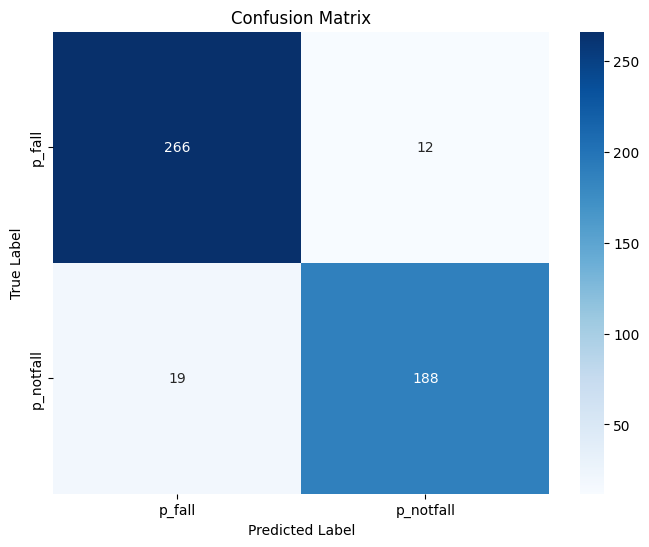

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [31]:
from tensorflow.keras.preprocessing import image

def classify_single_image(img_path):
    # Load the image
    img = image.load_img(img_path, target_size=(img_height, img_width))
    
    # Convert the image to a numpy array
    img_array = image.img_to_array(img)
    
    # Add a batch dimension (since the model expects a batch of images)
    img_array = np.expand_dims(img_array, axis=0)
    
    # Preprocess the image (use the same preprocessing as your dataset)
    img_array = preprocess_input(img_array)  # If using ResNet50 or similar
    
    # Make a prediction
    predictions = model1.predict(img_array)
    
    # Get the predicted class
    predicted_class = np.argmax(predictions, axis=1)
    
    # Map the predicted class index to the corresponding class name
    class_name = class_names[predicted_class[0]]
    
    return class_name

# Example usage
image_path = '/Users/User/Desktop/fall_detection/fall.jpg'  # Replace with your image path
result = classify_single_image(image_path)
print(f"The image is classified as: {result}")

The image is classified as: p_notfall
